In [2]:
from typing import List, Dict, Tuple, Callable
import warnings
import traceback
from pdb import set_trace
import os
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)
import tensorflow as tf
from tensorflow.keras.utils import to_categorical



df = pd.read_csv("Dry_Bean_Dataset.csv")
df.rename(columns={"roundness": "Roundness"}, inplace=True)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  Roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


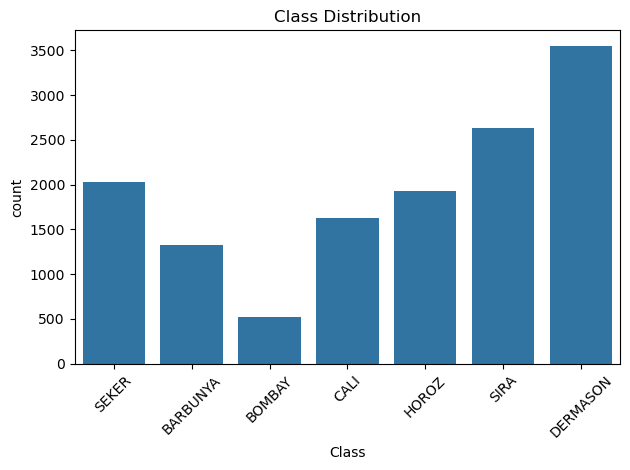

In [4]:
sns.countplot(data=df, x="Class")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

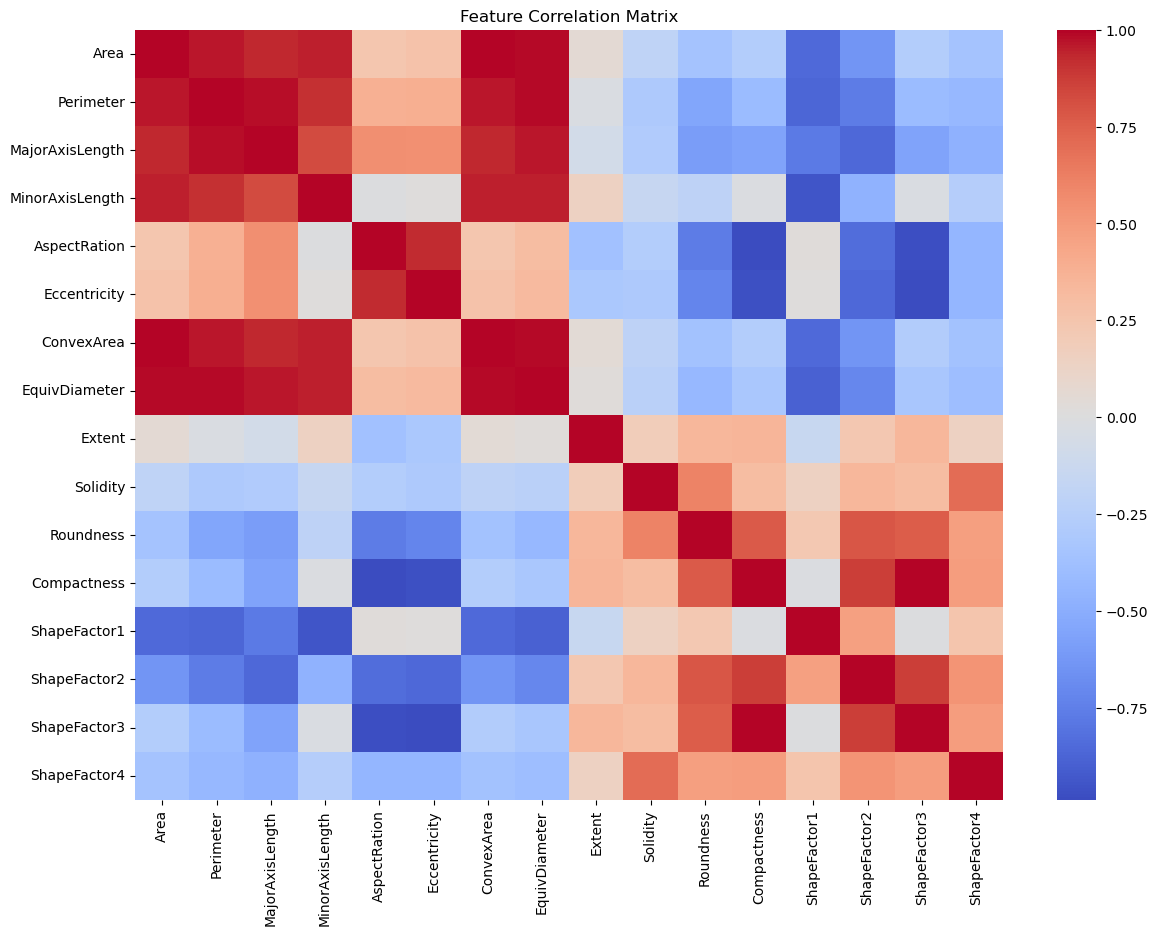

In [5]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=["Class"]).corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

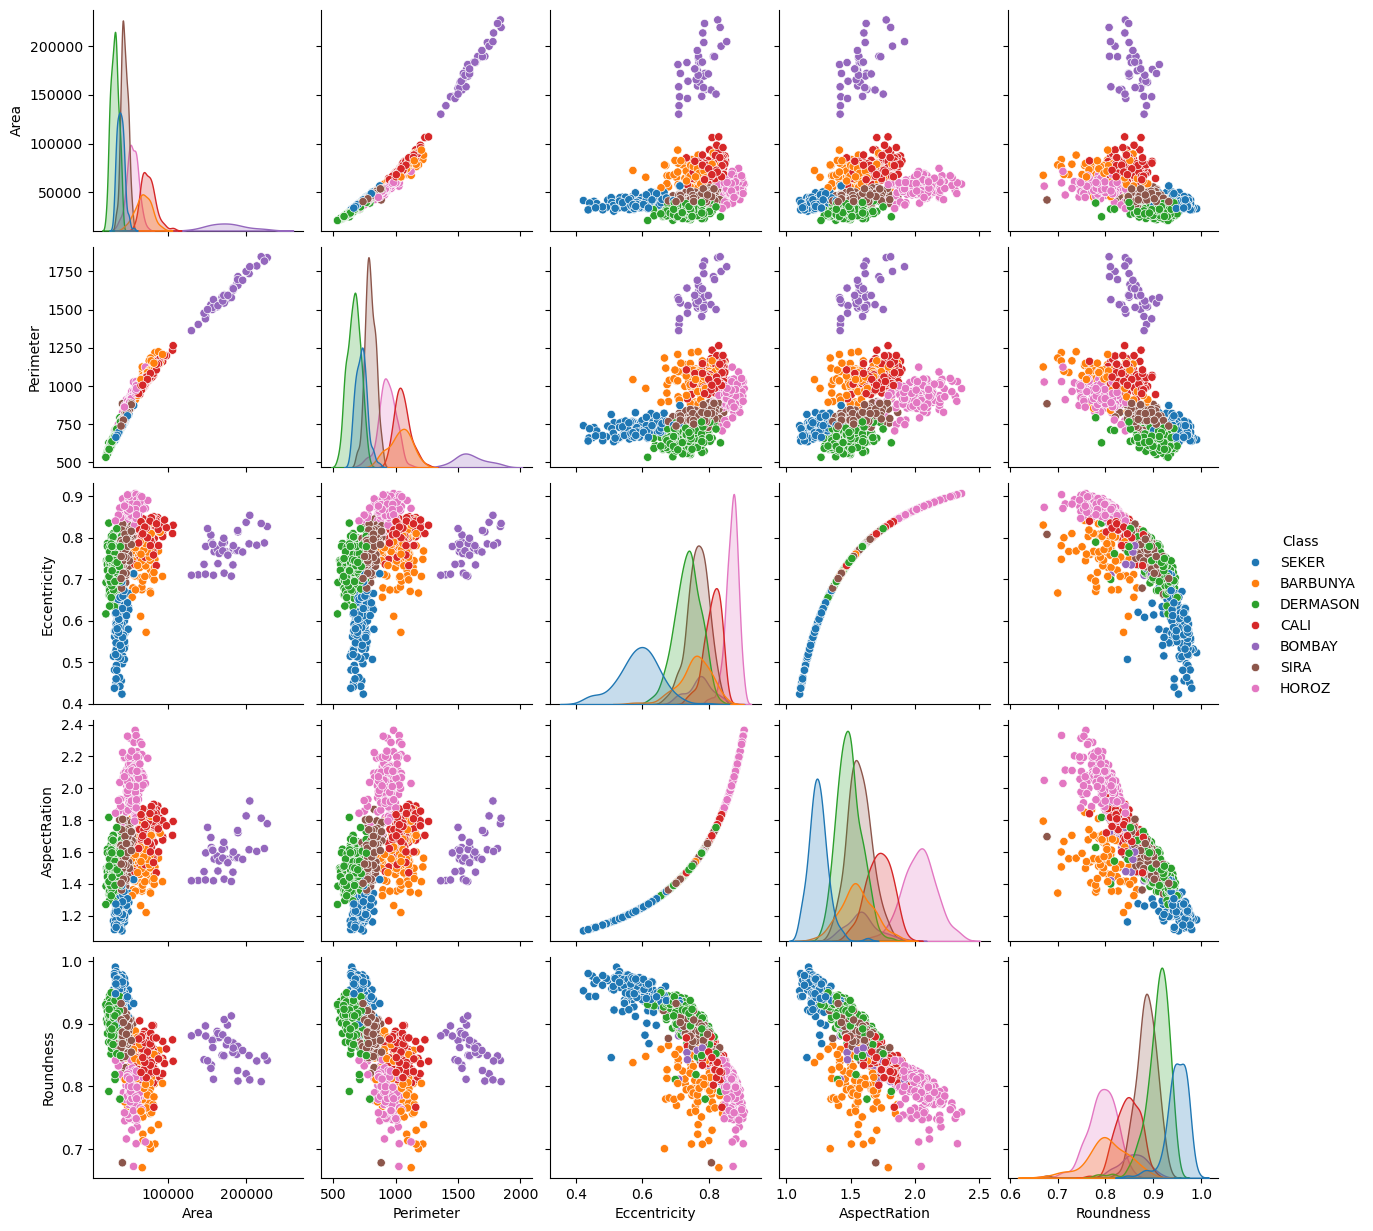

In [6]:
# small sample to create pairplot for 5 features.
sampled_df = df.sample(1000, random_state=42)
selected_features = ["Area", "Perimeter", "Eccentricity", "AspectRation", "Roundness"]
sns.pairplot(sampled_df, hue="Class", vars=selected_features)
plt.show()


In [7]:
# Preprocessing
X = df[selected_features]
y = df["Class"]
# Lable encoding
le = LabelEncoder()
y = le.fit_transform(y)
# Scaling numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [8]:
# Splitting dataset
def get_train_valid_test_data(X: np.ndarray, y: np.ndarray):
    """ Splits the data into train, validation, and test sets. """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=0.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=0.8, random_state=42)
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

# Split the Data
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)

Random Forest Accuracy: 0.9126

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.87      0.89       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.89      0.93      0.91       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.95      0.94      0.95       408
       SEKER       0.95      0.94      0.95       413
        SIRA       0.86      0.86      0.86       536

    accuracy                           0.91      2723
   macro avg       0.92      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



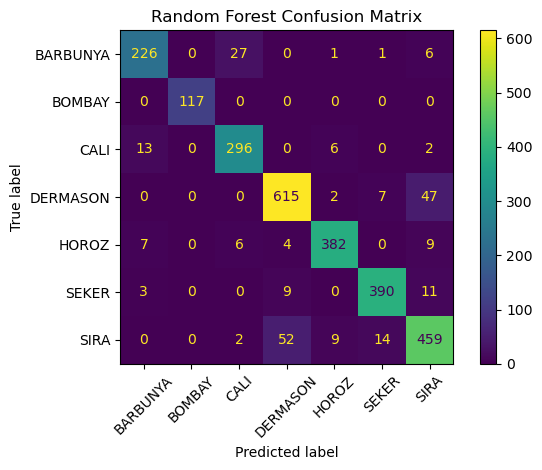

In [9]:
#Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_trn, y_trn)

#prediction
y_pred = rf.predict(X_tst)

#accuracy
accuracy = accuracy_score(y_tst, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

#classification report
print("\nClassification Report:")
print(classification_report(y_tst, y_pred, target_names=le.classes_))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_tst, y_pred, display_labels=le.classes_, xticks_rotation=45
)
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

In [10]:
def build_neural_net(
    input_shape: Tuple, 
    n_layers: int,
    n_units_per_layer: int,
    n_outputs: int,
    loss: str,
    metrics: List[str],
    optimizer: str = 'adam',
    hidden_activation: str = 'relu',
    output_activation: str = 'linear'
) -> tf.keras.Sequential:
    """ A wrapper function for TensorFlow that automatically creates a 
        neural network based on the specified parameters. Written by
        Alec Pike. 

        Args:
            input_shape: a tuple signifying the shape of the input data

            n_layers: the number of hidden layers in the network
            
            n_units_per_layer: the number of neurons in each hidden layer

            n_outputs: the number of values produced by the output layer

            loss: string signifying how the model should compute loss
            
            metrics: list of strings signifying how to judge model 
                performance
            
            optimizer: string signifying the optimization algorithm to
                be used in training (defaults to 'adam')

            hidden_activation: string signifying the activation function
                to use in the hidden layers (defaults to 'relu')

            output_activation: string signifying the activation function
                to use in the output layer (defaults to 'linear')

        Return:
            A tf.keras.Sequential object containing the desired neural
                network
    """

    # Declare model and specify input shape
    out = tf.keras.Sequential([tf.keras.Input(shape=input_shape)])
    
    # Iteratively add hidden layers
    for i in range(n_layers):
        out.add(tf.keras.layers.Dense(n_units_per_layer, activation=hidden_activation))
        
    # Add the output layer
    out.add(tf.keras.layers.Dense(n_outputs, activation=output_activation))
    
    # Compile
    out.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return out

In [11]:
# one-hot encoding lables
y_onehot = to_categorical(y)

X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y_onehot)

#Build and training neural network
input_shape = (X_trn.shape[1],)
n_classes = y_trn.shape[1]
model = build_neural_net(
    input_shape=input_shape,
    n_layers=3,
    n_units_per_layer=64,
    n_outputs=n_classes,
    loss="categorical_crossentropy",
    metrics=["accuracy"],
    optimizer="adam",
    hidden_activation="relu",
    output_activation="softmax"
)

history = model.fit(
    X_trn, y_trn,
    validation_data=(X_vld, y_vld),
    epochs=25,
    batch_size=32,
    verbose=1
)

Epoch 1/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6934 - loss: 0.9806 - val_accuracy: 0.9077 - val_loss: 0.2762
Epoch 2/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9035 - loss: 0.2640 - val_accuracy: 0.9105 - val_loss: 0.2594
Epoch 3/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9157 - loss: 0.2402 - val_accuracy: 0.9073 - val_loss: 0.2479
Epoch 4/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9118 - loss: 0.2329 - val_accuracy: 0.9123 - val_loss: 0.2511
Epoch 5/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9089 - loss: 0.2480 - val_accuracy: 0.9054 - val_loss: 0.2573
Epoch 6/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9159 - loss: 0.2292 - val_accuracy: 0.9141 - val_loss: 0.2421
Epoch 7/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9184 - loss: 0.2228 - val_accuracy: 0.9155 - val_loss: 0.2460
Epoch 8/25
273/273 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9139 - loss: 0.2298 - val_accuracy: 0.

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9273 - loss: 0.2059

Neural Network Test Accuracy: 0.9229


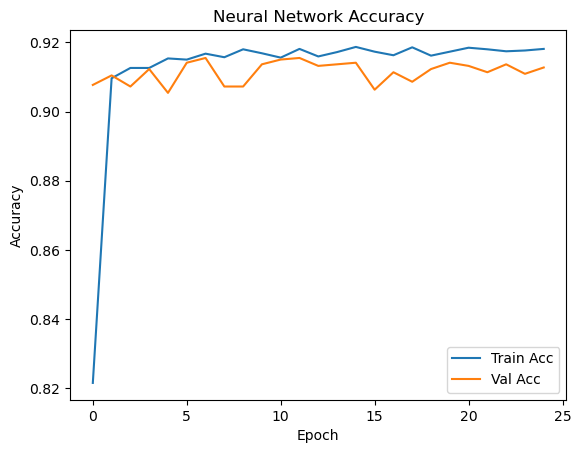

In [12]:
# Evaluation and visualization
test_loss, test_acc = model.evaluate(X_tst, y_tst)
print(f"\nNeural Network Test Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Neural Network Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step

Neural Network Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.91      0.87      0.89       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.91      0.95      0.93       317
    DERMASON       0.90      0.94      0.92       671
       HOROZ       0.96      0.95      0.96       408
       SEKER       0.96      0.94      0.95       413
        SIRA       0.89      0.85      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



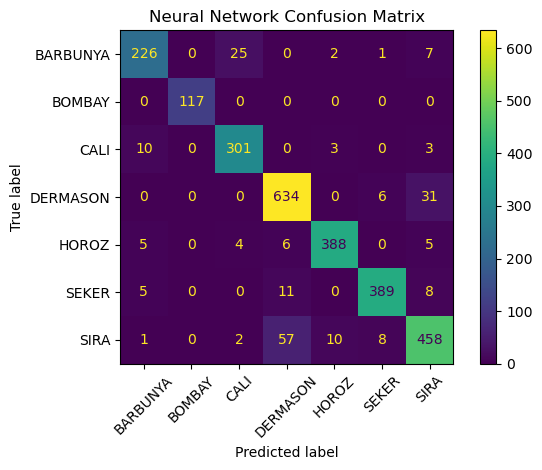

In [13]:
#converting for confusion matrix
y_true_labels = np.argmax(y_tst, axis=1)

#predicting possibilities
y_pred_probs = model.predict(X_tst)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
print("\nNeural Network Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=le.classes_))

#confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_true_labels, y_pred_labels, display_labels=le.classes_, xticks_rotation=45
)
plt.title("Neural Network Confusion Matrix")
plt.tight_layout()
plt.show()